<a href="https://colab.research.google.com/github/MariamAmmar/6644_Final_Project/blob/main/Florida_projectgroup39.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [1]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url1 = '/content/sample_data/price_fact.csv'
price_data = pd.read_csv(url1)
url2 = '/content/sample_data/site_dim.csv'
site_data = pd.read_csv(url2)

In [3]:
#rename column site_number to site_id

site_data.rename(columns={'site_number': 'site_id'}, inplace=True)

In [4]:
#Merge price_data and site_data based on site_number column

merged_data = pd.merge(price_data, site_data, on='site_id')


In [5]:
unique_sites_per_state = (
    merged_data.groupby('site_state_desc')['site_id']
    .nunique()
    .reset_index(name='unique_site_count')
)

print(unique_sites_per_state)

   site_state_desc  unique_site_count
0          Alabama                145
1           Alaska                 24
2          Arizona                555
3         Arkansas                 12
4       California                165
5         Colorado                176
6          Florida                638
7          Georgia                282
8            Idaho                  2
9         Illinois                300
10         Indiana                159
11            Iowa                  5
12        Kentucky                 85
13       Louisiana                190
14           Maine                 86
15        Maryland                  2
16   Massachusetts                 13
17        Michigan                 41
18       Minnesota                241
19     Mississippi                 88
20        Missouri                 60
21         Montana                 24
22          Nevada                 34
23   New Hampshire                 57
24      New Mexico                 72
25        Ne

In [6]:
#unique site_id per Business Unit

unique_sites_per_BU = (
    merged_data.groupby('BU_simplified_name')['site_id']
    .nunique()
    .reset_index(name='unique_site_count')
)

unique_sites_per_BU.head(10)

,BU_simplified_name,unique_site_count
0,COASTAL CAROLINAS,366
1,FLORIDA,417
2,GRAND CANYON,589
3,GREAT LAKES,416
4,GULF COAST,477
5,HEARTLAND,365
6,MIDWEST,397
7,NORTHERN TIER,391
8,ROCKY MOUNTAINS,316
9,SOUTH ATLANTIC,346


In [7]:
#data for Florida State

state_florida_data = merged_data[merged_data['site_state_desc'] == 'Florida']
state_florida_data.head()

,site_id,fiscal_week_end_date,item_sales,units_sold,avg_basket,units_per_basket,unit_price,gross_package_cost,net_single_unit_cost,net_package_cost,...,Fresh_Food_Fast_Program_Indicator,site_number.1,division_desc,Region_ID,region_desc,Market_ID,site_country_id,site_state_desc,BU_simplified_name,Eastern_Canada_Breakdown
0,2721169,9/3/2023,38.90,18,10.18,4.17,2.16,32.84,NaN,NaN,...,True,2721169,2900 - South Atlantic Division,2930,2930 - South Atlantic - Fowler,2938,US,Florida,SOUTH ATLANTIC,Other
1,2721169,11/26/2023,1365.85,611,14.36,4.85,2.26,30.88,NaN,NaN,...,True,2721169,2900 - South Atlantic Division,2930,2930 - South Atlantic - Fowler,2938,US,Florida,SOUTH ATLANTIC,Other
2,2721169,2/4/2024,1509.18,627,12.64,4.07,2.42,33.95,NaN,NaN,...,True,2721169,2900 - South Atlantic Division,2930,2930 - South Atlantic - Fowler,2938,US,Florida,SOUTH ATLANTIC,Other
3,2721169,7/30/2023,83.01,39,17.07,6.44,2.14,32.19,NaN,NaN,...,True,2721169,2900 - South Atlantic Division,2930,2930 - South Atlantic - Fowler,2938,US,Florida,SOUTH ATLANTIC,Other
4,2721169,10/29/2023,42.94,20,9.13,3.50,2.16,32.21,NaN,NaN,...,True,2721169,2900 - South Atlantic Division,2930,2930 - South Atlantic - Fowler,2938,US,Florida,SOUTH ATLANTIC,Other


In [8]:
#Business Unit in Florida state

state_unique_sites_per_BU = (
    state_florida_data.groupby('BU_simplified_name')['site_id']
    .nunique()
    .reset_index(name='unique_site_count')
)

state_unique_sites_per_BU.head(10)

,BU_simplified_name,unique_site_count
0,FLORIDA,417
1,GULF COAST,42
2,SOUTH ATLANTIC,179


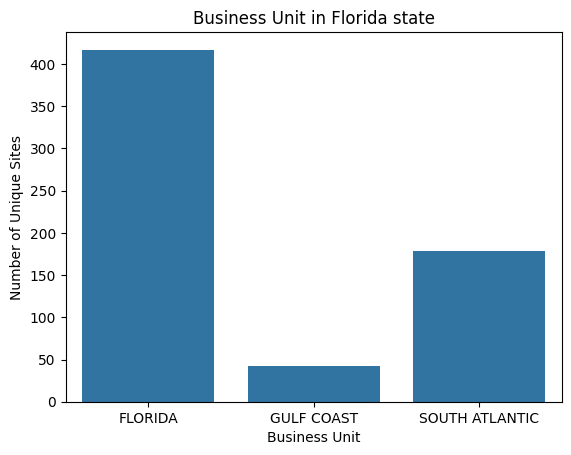

In [9]:
# Create a bar chart of unique sites per BU
sns.barplot(x='BU_simplified_name', y='unique_site_count', data=state_unique_sites_per_BU)
plt.xlabel('Business Unit')
plt.ylabel('Number of Unique Sites')
plt.title('Business Unit in Florida state')
plt.show()

In [10]:
#data for Business_unit "FLORIDA"

BU_FLORIDA_data = merged_data[merged_data['BU_simplified_name'] == 'FLORIDA']
BU_FLORIDA_data.to_csv('BU_FLORIDA_data.csv', index=False)
BU_FLORIDA_data.head()

,site_id,fiscal_week_end_date,item_sales,units_sold,avg_basket,units_per_basket,unit_price,gross_package_cost,net_single_unit_cost,net_package_cost,...,Fresh_Food_Fast_Program_Indicator,site_number.1,division_desc,Region_ID,region_desc,Market_ID,site_country_id,site_state_desc,BU_simplified_name,Eastern_Canada_Breakdown
439,2722003,7/2/2023,130.80,56,16.62,6.27,2.41,31.04,NaN,NaN,...,False,2722003,1400 - Florida Division,1430,1430 - Daytona,1431,US,Florida,FLORIDA,Other
440,2722003,12/3/2023,2493.65,1045,14.05,4.35,2.49,30.40,1.13,27.22,...,False,2722003,1400 - Florida Division,1430,1430 - Daytona,1431,US,Florida,FLORIDA,Other
441,2722003,2/4/2024,3089.87,1415,11.73,4.06,2.25,31.43,1.17,28.00,...,False,2722003,1400 - Florida Division,1430,1430 - Daytona,1431,US,Florida,FLORIDA,Other
442,2722003,5/28/2023,144.21,61,12.68,4.75,2.41,30.96,NaN,NaN,...,False,2722003,1400 - Florida Division,1430,1430 - Daytona,1431,US,Florida,FLORIDA,Other
443,2722003,2/26/2023,142.76,63,19.75,5.67,2.36,31.06,NaN,NaN,...,False,2722003,1400 - Florida Division,1430,1430 - Daytona,1431,US,Florida,FLORIDA,Other


In [11]:
print(BU_FLORIDA_data.shape)


(22804, 32)


In [12]:
# check NaN values for each column

nan_values = BU_FLORIDA_data.isnull().sum()

print(nan_values)

site_id                                  0
fiscal_week_end_date                     0
item_sales                               0
units_sold                               0
avg_basket                               0
units_per_basket                         0
unit_price                               0
gross_package_cost                     830
net_single_unit_cost                 17384
net_package_cost                     17384
num_transactions                         0
store_size                               0
market_share                            55
car_traffic                            385
seconds_to_near_highway                  0
dist_nearest_act_site                    0
Final_urbanicity                         0
Pop_Estimate_CrYr                        0
dist_nearest_grocery                    55
Total_merch_revenue_2022                 0
Median_HH_Income_CrYr                    0
closest_tier1_competitor                55
Fresh_Food_Fast_Program_Indicator        0
site_number

In [13]:
# Count the number of data for each unique site_id
count_per_site_id = BU_FLORIDA_data['site_id'].value_counts()

# Print the count for each site_id
print(count_per_site_id)

2722003    55
2708952    55
2700159    55
2708978    55
2709787    55
           ..
2704755    51
2701686    51
2707303    51
2709742    49
2704881    22
Name: site_id, Length: 417, dtype: int64


In [14]:
# Remove rows where the count_per_site_id value is not 55

BU_FLORIDA_data = BU_FLORIDA_data[BU_FLORIDA_data['site_id'].isin(count_per_site_id[count_per_site_id == 55].index)]


In [15]:
print(BU_FLORIDA_data.shape)

(19855, 32)


In [16]:
# Number of unique site_id after removing site_id != 55

unique_site_id_count = BU_FLORIDA_data['site_id'].nunique()

print(unique_site_id_count)


361


In [17]:
# prompt: create a csv file BU_FLORIDA_data

BU_FLORIDA_data.to_csv('BU_FLORIDA_data.csv', index=False)


In [18]:
BU_FLORIDA_data.head()

,site_id,fiscal_week_end_date,item_sales,units_sold,avg_basket,units_per_basket,unit_price,gross_package_cost,net_single_unit_cost,net_package_cost,...,Fresh_Food_Fast_Program_Indicator,site_number.1,division_desc,Region_ID,region_desc,Market_ID,site_country_id,site_state_desc,BU_simplified_name,Eastern_Canada_Breakdown
439,2722003,7/2/2023,130.80,56,16.62,6.27,2.41,31.04,NaN,NaN,...,False,2722003,1400 - Florida Division,1430,1430 - Daytona,1431,US,Florida,FLORIDA,Other
440,2722003,12/3/2023,2493.65,1045,14.05,4.35,2.49,30.40,1.13,27.22,...,False,2722003,1400 - Florida Division,1430,1430 - Daytona,1431,US,Florida,FLORIDA,Other
441,2722003,2/4/2024,3089.87,1415,11.73,4.06,2.25,31.43,1.17,28.00,...,False,2722003,1400 - Florida Division,1430,1430 - Daytona,1431,US,Florida,FLORIDA,Other
442,2722003,5/28/2023,144.21,61,12.68,4.75,2.41,30.96,NaN,NaN,...,False,2722003,1400 - Florida Division,1430,1430 - Daytona,1431,US,Florida,FLORIDA,Other
443,2722003,2/26/2023,142.76,63,19.75,5.67,2.36,31.06,NaN,NaN,...,False,2722003,1400 - Florida Division,1430,1430 - Daytona,1431,US,Florida,FLORIDA,Other


In [19]:
# Create column fiscal_week_end_date as a time frame

BU_FLORIDA_data['fiscal_week_end_date'] = pd.to_datetime(BU_FLORIDA_data['fiscal_week_end_date'])
BU_FLORIDA_data.head()

,site_id,fiscal_week_end_date,item_sales,units_sold,avg_basket,units_per_basket,unit_price,gross_package_cost,net_single_unit_cost,net_package_cost,...,Fresh_Food_Fast_Program_Indicator,site_number.1,division_desc,Region_ID,region_desc,Market_ID,site_country_id,site_state_desc,BU_simplified_name,Eastern_Canada_Breakdown
439,2722003,2023-07-02,130.80,56,16.62,6.27,2.41,31.04,NaN,NaN,...,False,2722003,1400 - Florida Division,1430,1430 - Daytona,1431,US,Florida,FLORIDA,Other
440,2722003,2023-12-03,2493.65,1045,14.05,4.35,2.49,30.40,1.13,27.22,...,False,2722003,1400 - Florida Division,1430,1430 - Daytona,1431,US,Florida,FLORIDA,Other
441,2722003,2024-02-04,3089.87,1415,11.73,4.06,2.25,31.43,1.17,28.00,...,False,2722003,1400 - Florida Division,1430,1430 - Daytona,1431,US,Florida,FLORIDA,Other
442,2722003,2023-05-28,144.21,61,12.68,4.75,2.41,30.96,NaN,NaN,...,False,2722003,1400 - Florida Division,1430,1430 - Daytona,1431,US,Florida,FLORIDA,Other
443,2722003,2023-02-26,142.76,63,19.75,5.67,2.36,31.06,NaN,NaN,...,False,2722003,1400 - Florida Division,1430,1430 - Daytona,1431,US,Florida,FLORIDA,Other


In [20]:
# Sort Value

BU_FLORIDA_data.sort_values(by='fiscal_week_end_date', inplace=True)

In [21]:
# aggregate item_sales weekly

weekly_sales = BU_FLORIDA_data.groupby('fiscal_week_end_date')['item_sales'].sum()
print(weekly_sales)

fiscal_week_end_date
2023-02-05     16434.00
2023-02-12     28159.72
2023-02-19     29924.74
2023-02-26     34584.97
2023-03-05     32961.16
2023-03-12     30311.17
2023-03-19     27871.09
2023-03-26     28020.87
2023-04-02     29194.46
2023-04-09     28482.72
2023-04-16     26784.18
2023-04-23     34990.73
2023-04-30     39735.75
2023-05-07     43913.88
2023-05-14     43526.41
2023-05-21     50969.81
2023-05-28     49241.79
2023-06-04     47849.22
2023-06-11     47037.64
2023-06-18     43993.06
2023-06-25     39435.08
2023-07-02     36479.67
2023-07-09     33176.72
2023-07-16     30797.63
2023-07-23     30071.14
2023-07-30     27080.00
2023-08-06     26593.51
2023-08-13     26447.91
2023-08-20     22707.24
2023-08-27     22514.35
2023-09-03     19240.15
2023-09-10     21038.89
2023-09-17     24011.08
2023-09-24     25461.25
2023-10-01     24540.73
2023-10-08     25841.67
2023-10-15     25437.52
2023-10-22     24674.86
2023-10-29     25164.41
2023-11-05     23259.60
2023-11-12     2283

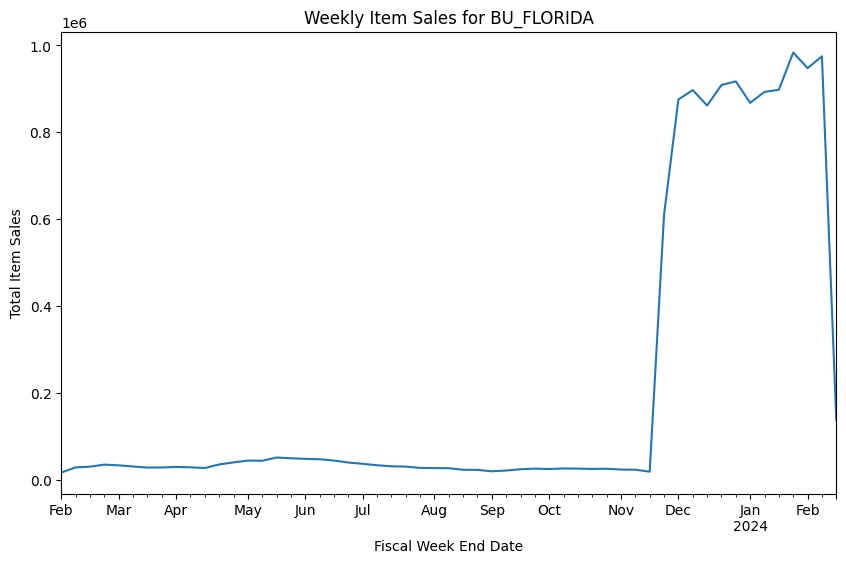

In [22]:
#Create a line graph for weekly_sales

weekly_sales.plot(kind='line', figsize=(10, 6))
plt.xlabel('Fiscal Week End Date')
plt.ylabel('Total Item Sales')
plt.title('Weekly Item Sales for BU_FLORIDA')
plt.show()